### import necessary libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\amirz\\OneDrive\\Desktop\\medical_examination.csv")


### before we start, lets strip the column names to prevent errors

In [7]:
df.columns = df.columns.str.strip()

### lets calculate BMI's and determine which subjects are overweight

In [8]:
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
df["overweight"] = df['BMI'].apply(lambda x: 1 if x > 25 else 0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


### now we binarize our cholestrol and glucose columns to see which are healthy and which arent

In [13]:
df['cholesterol'] = df['cholesterol'].apply(lambda x:0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x:0 if x==1 else 1)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,0,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,0,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


### lets plot the data

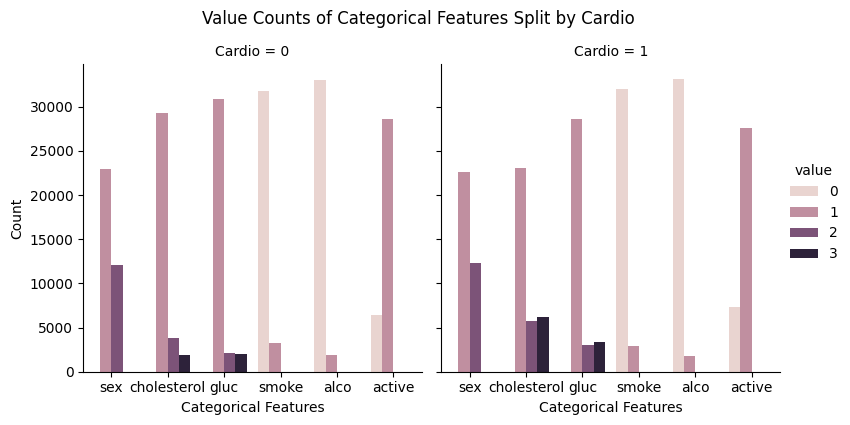

In [11]:
# Melt the DataFrame into long format
melted_df = pd.melt(df, id_vars=['cardio'], value_vars=['sex', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'])

# Create the catplot
g = sns.catplot(x='variable', hue='value', col='cardio', data=melted_df, kind='count', height=4, aspect=1)

# Set titles for each subplot
g.set_titles("Cardio = {col_name}")

g.set_axis_labels('Categorical Features', 'Count')
plt.suptitle('Value Counts of Categorical Features Split by Cardio', y=1.05)


plt.show()


### lets clean the data

In [15]:
# Filter out the incorrect data
cleaned_df = df[(df['ap_lo'] <= df['ap_hi']) &
                (df['height'] >= df['height'].quantile(0.025)) &
                (df['height'] <= df['height'].quantile(0.975)) &
                (df['weight'] >= df['weight'].quantile(0.025)) &
                (df['weight'] <= df['weight'].quantile(0.975))]

# Display the cleaned DataFrame
cleaned_df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,0,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,0,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


### now we make a heatmap


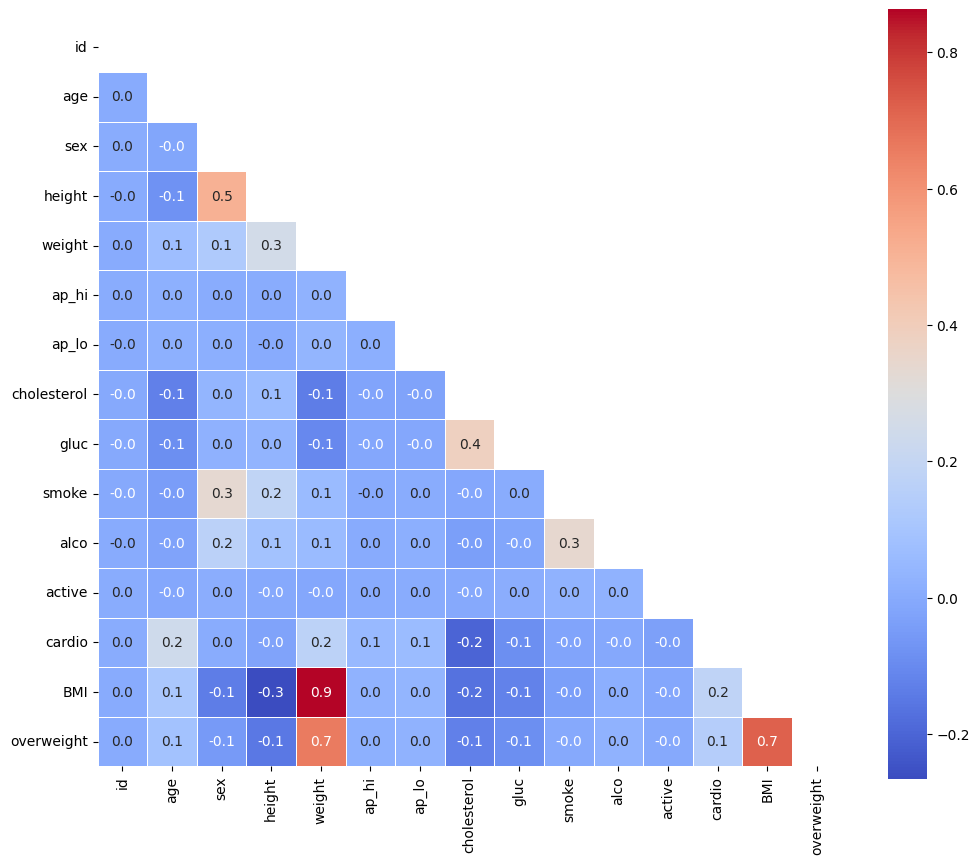

In [18]:
fig = None  # Placeholder, we'll update it after drawing the heatmap


# this will Draw the Heat Map in the draw_heat_map function
def draw_heat_map():
    # Task 11: Clean the data in the df_heat variable
    df_heat = df[(df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]
    
    # Calculate the correlation matrix and store it in the corr variable
    corr = df_heat.corr()
    
    # Generate a mask for the upper triangle and store it in the mask variable
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Plot the correlation matrix using Seaborn's heatmap() function
    sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', linewidths=.5, cmap='coolwarm', square=True, ax=ax)
    plt.show()

# Call the function to draw the heatmap
draw_heat_map()

